In [1]:
import pandas as pd
import math
import matplotlib as mpl
#mpl.use('pdf')
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
import matplotlib
import seaborn as sns
import scipy

#Red
red1= sns.color_palette("Reds_d",1)
red2= sns.color_palette("Reds_d",2)
red3= sns.color_palette("Reds_d",3)
red4= sns.color_palette("Reds_d",4)
red5= sns.color_palette("Reds_d",5)
red6= sns.color_palette("Reds_d",6)
red7= sns.color_palette("Reds_d",7)
red8= sns.color_palette("Reds_d",8)

#YellowGreen
yg1= sns.color_palette("YlGn_d",1)
yg2= sns.color_palette("YlGn_d",2)
yg3= sns.color_palette("YlGn_d",3)
yg4= sns.color_palette("YlGn_d",4)
yg5= sns.color_palette("YlGn_d",5)
yg7= sns.color_palette("YlGn_d",7)
 
#GreenBlue
gb1= sns.color_palette("GnBu_d",1)
gb2= sns.color_palette("GnBu_d",2)
gb3= sns.color_palette("GnBu_d",3)
gb4= sns.color_palette("GnBu_d",4)
gb5= sns.color_palette("GnBu_d",5)
gb6= sns.color_palette("GnBu_d",6)
gb7= sns.color_palette("GnBu_d",7)
gb8= sns.color_palette("GnBu_d",8)

cp2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],gb7[4]]))
cp2v1 = list(map(lambda x: sns.desaturate(x,0.9),[red7[2],yg7[0]]))
cp3 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],gb7[4],red7[2]]))
cp4 = list(map(lambda x: sns.desaturate(x,0.9),[yg7[0],red7[2], yg7[5],gb7[4]]))
cp2_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[0],red7[3],yg7[1],gb7[4]]))
cp3_2 = list(map(lambda x: sns.desaturate(x,0.9),[red7[5],red7[0],red7[3],yg7[1],gb7[4]]))
cp_total_spectrum = list(map(lambda x: sns.desaturate(x,0.9),gb7 + yg7 + red7))
cp_2048_game = list(map(lambda x: sns.desaturate(x,0.9),["#fcefe6","#f2e8cb","#f5b682","#f29446","#ff775c","#e64c2e","#ede291","#fce130","#ffdb4a","#f0b922","#fad74d"]))   
cp_2048_game_sel = list(map(lambda x: sns.desaturate(x,0.9),["#e64c2e","#f0b922",yg7[1],gb7[4]]))                      

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector
    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

#sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's') 
colors1 = mpl.colormaps['Spectral'](np.linspace(0.0, 0.5, 100))
colors2 = mpl.colormaps['Spectral'](np.linspace(0.5, 0.7, 26))
colors3 = mpl.colormaps['Spectral'](np.linspace(0.7, 1, 130))
# combine them and build a new colormap
colors = np.vstack((colors1, colors2,colors3))
spectral_lessyel = matplotlib.colors.LinearSegmentedColormap.from_list('my_colormap', colors)
#light_jet = cmap_map(lambda x: x*0.75 + 0.2, mpl.colormaps['gist_rainbow'])
#light_jet_desat = cmap_map(lambda x: sns.desaturate(x,0.7), light_jet)

In [2]:
sns.set_palette(cp3)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443)]

In [3]:
sns.set_palette(cp2v1)
sns.color_palette()

[(0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.6120315263360248, 0.8081330257593233, 0.5357962322183778)]

In [4]:
sns.set_palette(cp4)
sns.color_palette()

[(0.6120315263360248, 0.8081330257593233, 0.5357962322183778),
 (0.8807358708189157, 0.32277047289504046, 0.2744659746251443),
 (0.21773010380622843, 0.39735640138408307, 0.268885813148789),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [5]:
sns.set_palette(cp3_2)
sns.color_palette()

[(0.5228235294117647, 0.2094948096885813, 0.1949619377162629),
 (0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [6]:
sns.set_palette(cp2_2)
sns.color_palette()

[(0.9364108676150199, 0.5331674996796103, 0.44647776496219393),
 (0.850771241830065, 0.21914033064206087, 0.18984390618992708),
 (0.4879192618223761, 0.7401222606689734, 0.4719192618223761),
 (0.2649160579264386, 0.5270152505446624, 0.6269460463924131)]

In [7]:
#sns.set_palette(cp_2048_game)
#sns.color_palette()

In [8]:
#sns.set_palette(cp_2048_game_sel)
#sns.color_palette()

In [9]:
def transfer_log_read(filename):
    temp = pd.read_csv(filename, header=None, names = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'], 
                                                     dtype = {'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 
                                                              'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64} )
    temp.sort_values(by=['fire_t'])
    return temp

def dgemm_flops(df):
    df['flops'] = df['M']*df['N']*(2*df['K'] + 2)
    return df['M']*df['N']*(2*df['K'] + 2)
def dgemm_bytes(df):
    df['bytes'] = 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 
    return 8*(df['M']*(df['N']+df['K']) + df['N']*df['K']) 

font=8
#plt.rc('font', family='serif', serif='Times') #annoying warning filling my view, so disabled until needed
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)
plt.rc('axes', labelsize=font)
plt.rc('figure', titlesize=font)
# width as measured in inkscape
width = 3.487
height = width / 1.618

#fig, ax = plt.subplots()
#fig.subplots_adjust(left=.15, bottom=.17, right=.99, top=.97)

devices=8
machine = 'vulcan'

#version="1.5"
#split="ST-2D-BLOCK-CYCLIC"
#sr_over=""
#implementation="_UN-PB-L8"
#pw_optimize="_PW-PRED-PERF"
#impl_hops="_ALL-HOPS-1-0.20"
homedir = '~/mount_vulcan'
benchdir= homedir + '/PhD_stuff/PARALiA-Framework'
trans_log_dir = benchdir + '/Benchmarking/Transfer_logs_06-2023'

BLASxEx_data len: 624

XKBLAS_data len: 512

PARALiA_data len: 500

PARALiA_hop_data len: 6

BLASxEx_data(scenario=h_h_h) mean of 624 cases -> gbyte_s(ar) = 14.348 Gbytes/s
XKBLAS_data(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 21.036 Gbytes/s
PARALiA_data(scenario=h_h_h) mean of 500 cases -> gbyte_s(ar) = 24.279 Gbytes/s
PARALiA_hop_data(scenario=h_h_h) mean of 6 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_hop_data_unchained(scenario=h_h_h) mean of 12 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_combined_data(scenario=h_h_h) mean of 506 cases -> gbyte_s(ar) = 24.348 Gbytes/s
PARALiA_combined_data_unchained(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 24.416 Gbytes/s
BLASxEx_data len: 540

XKBLAS_data len: 512

PARALiA_data len: 331

PARALiA_hop_data len: 88

BLASxEx_data(scenario=0_0_0) mean of 540 cases -> gbyte_s(ar) = 21.816 Gbytes/s
XKBLAS_data(scenario=0_0_0) mean of 512 cases -> gbyte_s(ar) = 25.503 Gbytes/s
PARALiA_data(scenario=0_0_0) mean of 331 cases -> gb

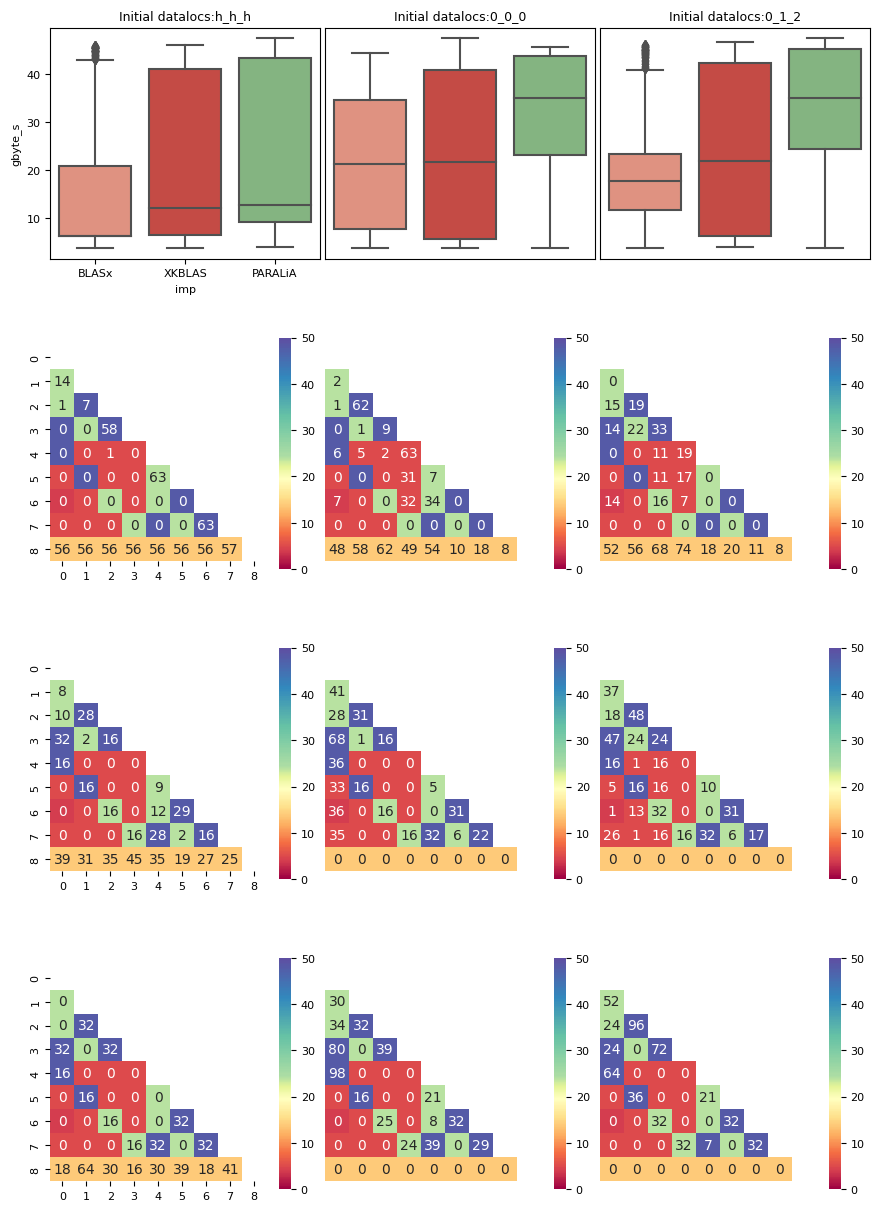

In [10]:
fig, ax = plt.subplots(4,3)
ctr = 0
for scenario in ['h_h_h', '0_0_0','0_1_2']: #,'0_0_-1',
    BLASxEx_data = transfer_log_read('%s/temp_blasx_trans_%s.log' %(trans_log_dir, scenario))
    print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

    XKBLAS_data = transfer_log_read('%s/temp_xkblas_trans_%s.log' %(trans_log_dir, scenario))
    print('XKBLAS_data len: %d\n' % len(XKBLAS_data))

    PARALiA_data = transfer_log_read('%s/temp_n_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_data len: %d\n' % len(PARALiA_data))
    PARALiA_hop_data = transfer_log_read('%s/temp_hop_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_hop_data len: %d\n' % len(PARALiA_hop_data))

    BLASxEx_data['pipe_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['fire_t']
    BLASxEx_data['transfer_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['sced_t']
    BLASxEx_data['gbyte_s'] = BLASxEx_data['bytes']/BLASxEx_data['transfer_t']/1e9
    BLASxEx_data['imp'] = 'BLASx'
    BLASxEx_data['trans_type'] = 'BLASx'
    print("BLASxEx_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(BLASxEx_data), BLASxEx_data['gbyte_s'].mean()))

    XKBLAS_data['pipe_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['fire_t']
    XKBLAS_data['transfer_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['sced_t']
    XKBLAS_data['gbyte_s'] = XKBLAS_data['bytes']/XKBLAS_data['transfer_t']/1e9
    XKBLAS_data['imp'] = 'XKBLAS'
    print("XKBLAS_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(XKBLAS_data), XKBLAS_data['gbyte_s'].mean()))

    PARALiA_data['pipe_t'] = PARALiA_data['complete_t'] - PARALiA_data['fire_t']
    PARALiA_data['transfer_t'] = PARALiA_data['complete_t'] - PARALiA_data['sced_t']
    PARALiA_data['gbyte_s'] = PARALiA_data['bytes']/PARALiA_data['transfer_t']/1e9
    PARALiA_data['imp'] = 'PARALiA_tr'
    print("PARALiA_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_data), PARALiA_data['gbyte_s'].mean()))
    PARALiA_hop_data['pipe_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['fire_t']
    PARALiA_hop_data['transfer_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['sced_t']
    PARALiA_hop_data['gbyte_s'] = PARALiA_hop_data['bytes']/PARALiA_hop_data['transfer_t']/1e9
    PARALiA_hop_data['imp'] = 'PARALiA_tr'
    print("PARALiA_hop_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data), PARALiA_hop_data['gbyte_s'].mean()))
    
    PARALiA_hop_data_unchained = pd.DataFrame(columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
    for index, row in PARALiA_hop_data.iterrows():
        dev_list = row['dev_list'].split()[1:-1]
        #print(dev_list)
        for idx in range(0,len(dev_list)-1):
            src = int(dev_list[idx])
            dest = int(dev_list[idx+1])
            #print (src,dest)
            new_row = pd.DataFrame([[src,dest,'[ %d %d ]' %(src,dest),row['bytes'], row['fire_t'], row['sced_t'], row['complete_t']]],columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
            PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data_unchained, new_row])
    PARALiA_hop_data_unchained = PARALiA_hop_data_unchained.astype({'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64})
    PARALiA_hop_data_unchained['pipe_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['fire_t']
    PARALiA_hop_data_unchained['transfer_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['sced_t']
    PARALiA_hop_data_unchained['gbyte_s'] = PARALiA_hop_data_unchained['bytes']/PARALiA_hop_data_unchained['transfer_t']/1e9
    PARALiA_hop_data_unchained['imp'] = 'PARALiA'
    #print(PARALiA_hop_data_unchained.dtypes)
    #print(PARALiA_hop_data_unchained)
    #PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data])
    print("PARALiA_hop_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data_unchained), PARALiA_hop_data_unchained['gbyte_s'].mean()))

    PARALiA_combined_data = pd.concat([PARALiA_data, PARALiA_hop_data])
    #PARALiA_combined_data['pipe_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['fire_t']
    #PARALiA_combined_data['transfer_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['sced_t']
    #PARALiA_combined_data['gbyte_s'] = PARALiA_combined_data['bytes']/PARALiA_combined_data['transfer_t']/1e9
    #PARALiA_combined_data['imp'] = 'PARALiA_tr'
    print("PARALiA_combined_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data), PARALiA_combined_data['gbyte_s'].mean()))
    
    PARALiA_combined_data_unchained = pd.concat([PARALiA_data, PARALiA_hop_data_unchained])
    PARALiA_combined_data_unchained['imp'] = 'PARALiA'
    print("PARALiA_combined_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data_unchained), PARALiA_combined_data_unchained['gbyte_s'].mean()))
    
    BLASxEx_data.drop(BLASxEx_data[BLASxEx_data['gbyte_s'] >= 50].index, inplace = True)
    XKBLAS_data.drop(XKBLAS_data[XKBLAS_data['gbyte_s'] >= 50].index, inplace = True)
    PARALiA_combined_data_unchained.drop(PARALiA_combined_data_unchained[PARALiA_combined_data_unchained['gbyte_s'] >= 50].index, inplace = True)
    
    data_alldev = pd.concat([BLASxEx_data,XKBLAS_data])
    #data_alldev = pd.concat([data_alldev,PARALiA_combined_data])
    data_alldev = pd.concat([data_alldev,PARALiA_combined_data_unchained])
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] <= 2].index, inplace = True)
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] >= 50].index, inplace = True)
    fig.set_size_inches(width*10/4, height*7)
    fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)
    #ax[0][ctr].set_ylim([0,50])
    #ax[0][ctr].set_yscale('log')
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[0][ctr])
    ax[0][ctr].set_title('Initial datalocs:' + scenario, size = font+1)
    
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in BLASxEx_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9                
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if idx1 == 8 and idx2 != 8:
                loc_ctr[idx1][idx2]+=8
            maskarr[idx1][idx2] = 0
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,0,0,0,0,0,0,0,0], [24,0,0,0,0,0,0,0,0], [24,48,0,0,0,0,0,0,0], [48,24,48,0,0,0,0,0,0], [48,5,5,5,0,0,0,0,0], 
                      [5,48,5,5,24,0,0,0,0], [4,5,24,5,24,48,0,0,0], [5,5,5,24,48,24,48,0,0], [14,14,14,14,14,14,14,14,0]])
    #print(labels)
    #sns.heatmap(data=loc_ctr,  ax=ax[1][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel)#, fmt = 's') 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in XKBLAS_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9                              
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,0,0,0,0,0,0,0,0], [24,0,0,0,0,0,0,0,0], [24,48,0,0,0,0,0,0,0], [48,24,48,0,0,0,0,0,0], [48,5,5,5,0,0,0,0,0], 
                      [5,48,5,5,24,0,0,0,0], [4,5,24,5,24,48,0,0,0], [5,5,5,24,48,24,48,0,0], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[2][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    dark_jet = cmap_map(lambda x: x*0.75, mpl.colormaps['gist_rainbow'])
    sns.heatmap(data=labels,  ax=ax[2][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel)#, fmt = 's')   
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in PARALiA_combined_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9                 
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,0,0,0,0,0,0,0,0], [24,0,0,0,0,0,0,0,0], [24,48,0,0,0,0,0,0,0], [48,24,48,0,0,0,0,0,0], [48,5,5,5,0,0,0,0,0], 
                      [5,48,5,5,24,0,0,0,0], [4,5,24,5,24,48,0,0,0], [5,5,5,24,48,24,48,0,0], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels)#, vmax=0, vmin=50, fmt = 's') 
    #sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0)#, fmt = 's') 
 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in PARALiA_combined_data_unchained.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9            
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,0,0,0,0,0,0,0,0], [24,0,0,0,0,0,0,0,0], [24,48,0,0,0,0,0,0,0], [48,24,48,0,0,0,0,0,0], [48,5,5,5,0,0,0,0,0], 
                      [5,48,5,5,24,0,0,0,0], [4,5,24,5,24,48,0,0,0], [5,5,5,24,48,24,48,0,0], [14,14,14,14,14,14,14,14,0]])
    sns.heatmap(data=labels,  ax=ax[3][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel)#, fmt = 's')   
    if(ctr!=0):     
        for ctr1 in range (0,4):
            ax[ctr1][ctr].set_yticks([])
            ax[ctr1][ctr].set_yticklabels('')
            ax[ctr1][ctr].minorticks_off()
            ax[ctr1][ctr].set_xticks([])
            ax[ctr1][ctr].set_ylabel('') 
            ax[ctr1][ctr].set_xlabel('')
        
    ctr+=1    
            
fig.savefig('Plot_trans_box_bide_mask.png') 

BLASxEx_data len: 624

XKBLAS_data len: 512

PARALiA_data len: 500

PARALiA_hop_data len: 6

BLASxEx_data(scenario=h_h_h) mean of 624 cases -> gbyte_s(ar) = 14.348 Gbytes/s
XKBLAS_data(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 21.036 Gbytes/s
PARALiA_data(scenario=h_h_h) mean of 500 cases -> gbyte_s(ar) = 24.279 Gbytes/s
PARALiA_hop_data(scenario=h_h_h) mean of 6 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_hop_data_unchained(scenario=h_h_h) mean of 12 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_combined_data(scenario=h_h_h) mean of 506 cases -> gbyte_s(ar) = 24.348 Gbytes/s
PARALiA_combined_data_unchained(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 24.416 Gbytes/s
BLASxEx_data len: 540

XKBLAS_data len: 512

PARALiA_data len: 331

PARALiA_hop_data len: 88

BLASxEx_data(scenario=0_0_0) mean of 540 cases -> gbyte_s(ar) = 21.816 Gbytes/s
XKBLAS_data(scenario=0_0_0) mean of 512 cases -> gbyte_s(ar) = 25.503 Gbytes/s
PARALiA_data(scenario=0_0_0) mean of 331 cases -> gb

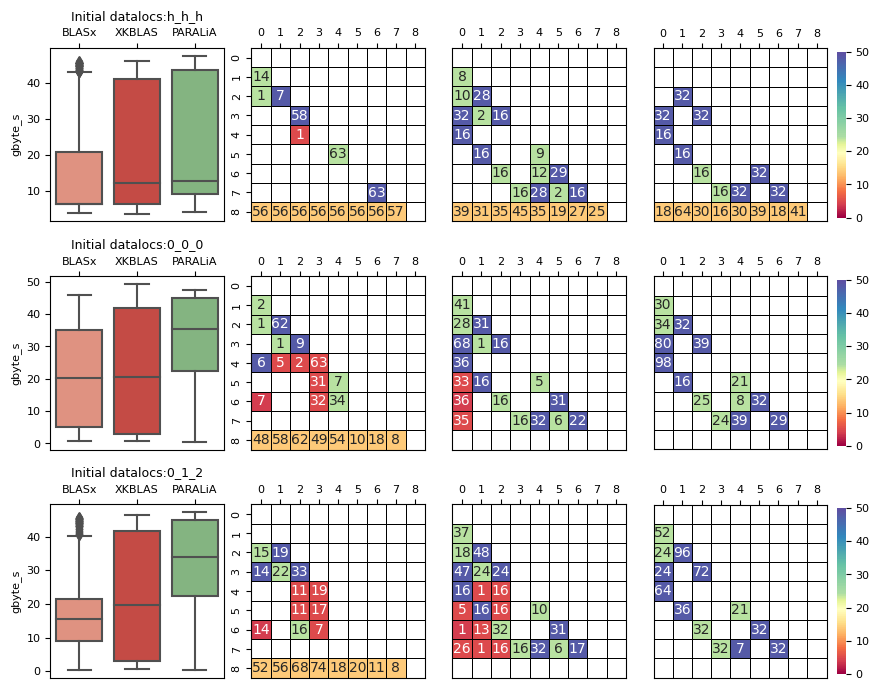

In [15]:

fig, ax = plt.subplots(3,4,gridspec_kw={'width_ratios': [3.08,3.08,3.08,3.84]})
ctr = 0
for scenario in ['h_h_h', '0_0_0','0_1_2']: #,'0_0_-1',
    BLASxEx_data = transfer_log_read('%s/temp_blasx_trans_%s.log' %(trans_log_dir, scenario))
    print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

    XKBLAS_data = transfer_log_read('%s/temp_xkblas_trans_%s.log' %(trans_log_dir, scenario))
    print('XKBLAS_data len: %d\n' % len(XKBLAS_data))

    PARALiA_data = transfer_log_read('%s/temp_n_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_data len: %d\n' % len(PARALiA_data))
    PARALiA_hop_data = transfer_log_read('%s/temp_hop_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_hop_data len: %d\n' % len(PARALiA_hop_data))

    BLASxEx_data['pipe_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['fire_t']
    BLASxEx_data['transfer_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['sced_t']
    BLASxEx_data['gbyte_s'] = BLASxEx_data['bytes']/BLASxEx_data['transfer_t']/1e9
    BLASxEx_data['imp'] = 'BLASx'
    BLASxEx_data['trans_type'] = 'BLASx'
    print("BLASxEx_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(BLASxEx_data), BLASxEx_data['gbyte_s'].mean()))

    XKBLAS_data['pipe_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['fire_t']
    XKBLAS_data['transfer_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['sced_t']
    XKBLAS_data['gbyte_s'] = XKBLAS_data['bytes']/XKBLAS_data['transfer_t']/1e9
    XKBLAS_data['imp'] = 'XKBLAS'
    print("XKBLAS_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(XKBLAS_data), XKBLAS_data['gbyte_s'].mean()))

    PARALiA_data['pipe_t'] = PARALiA_data['complete_t'] - PARALiA_data['fire_t']
    PARALiA_data['transfer_t'] = PARALiA_data['complete_t'] - PARALiA_data['sced_t']
    PARALiA_data['gbyte_s'] = PARALiA_data['bytes']/PARALiA_data['transfer_t']/1e9
    PARALiA_data['imp'] = 'PARALiA_tr'
    print("PARALiA_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_data), PARALiA_data['gbyte_s'].mean()))
    PARALiA_hop_data['pipe_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['fire_t']
    PARALiA_hop_data['transfer_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['sced_t']
    PARALiA_hop_data['gbyte_s'] = PARALiA_hop_data['bytes']/PARALiA_hop_data['transfer_t']/1e9
    PARALiA_hop_data['imp'] = 'PARALiA_tr'
    print("PARALiA_hop_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data), PARALiA_hop_data['gbyte_s'].mean()))
    
    PARALiA_hop_data_unchained = pd.DataFrame(columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
    for index, row in PARALiA_hop_data.iterrows():
        dev_list = row['dev_list'].split()[1:-1]
        #print(dev_list)
        for idx in range(0,len(dev_list)-1):
            src = int(dev_list[idx])
            dest = int(dev_list[idx+1])
            #print (src,dest)
            new_row = pd.DataFrame([[src,dest,'[ %d %d ]' %(src,dest),row['bytes'], row['fire_t'], row['sced_t'], row['complete_t']]],columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
            PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data_unchained, new_row])
    PARALiA_hop_data_unchained = PARALiA_hop_data_unchained.astype({'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64})
    PARALiA_hop_data_unchained['pipe_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['fire_t']
    PARALiA_hop_data_unchained['transfer_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['sced_t']
    PARALiA_hop_data_unchained['gbyte_s'] = PARALiA_hop_data_unchained['bytes']/PARALiA_hop_data_unchained['transfer_t']/1e9
    PARALiA_hop_data_unchained['imp'] = 'PARALiA'
    #print(PARALiA_hop_data_unchained.dtypes)
    #print(PARALiA_hop_data_unchained)
    #PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data])
    print("PARALiA_hop_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data_unchained), PARALiA_hop_data_unchained['gbyte_s'].mean()))

    PARALiA_combined_data = pd.concat([PARALiA_data, PARALiA_hop_data])
    #PARALiA_combined_data['pipe_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['fire_t']
    #PARALiA_combined_data['transfer_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['sced_t']
    #PARALiA_combined_data['gbyte_s'] = PARALiA_combined_data['bytes']/PARALiA_combined_data['transfer_t']/1e9
    #PARALiA_combined_data['imp'] = 'PARALiA_tr'
    print("PARALiA_combined_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data), PARALiA_combined_data['gbyte_s'].mean()))
    
    PARALiA_combined_data_unchained = pd.concat([PARALiA_data, PARALiA_hop_data_unchained])
    PARALiA_combined_data_unchained['imp'] = 'PARALiA'
    print("PARALiA_combined_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data_unchained), PARALiA_combined_data_unchained['gbyte_s'].mean()))
    
    BLASxEx_data.drop(BLASxEx_data[BLASxEx_data['gbyte_s'] >= 50].index, inplace = True)
    XKBLAS_data.drop(XKBLAS_data[XKBLAS_data['gbyte_s'] >= 50].index, inplace = True)
    PARALiA_combined_data_unchained.drop(PARALiA_combined_data_unchained[PARALiA_combined_data_unchained['gbyte_s'] >= 50].index, inplace = True)
    
    data_alldev = pd.concat([BLASxEx_data,XKBLAS_data])
    #data_alldev = pd.concat([data_alldev,PARALiA_combined_data])
    data_alldev = pd.concat([data_alldev,PARALiA_combined_data_unchained])
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] <= 2].index, inplace = True)
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] >= 50].index, inplace = True)
    fig.set_size_inches(width*10/4, height*4)
    fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.15, hspace=0.1)
    #ax[0][ctr].set_ylim([0,50])
    #ax[0][ctr].set_yscale('log')
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[ctr][0])
    ax[ctr][0].set_title('Initial datalocs:' + scenario, size = font+1)
    ax[ctr][0].set_aspect(1.0/ax[ctr][0].get_data_ratio(), adjustable='box')
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in BLASxEx_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9            
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if idx1 == 8 and idx2 != 8:
                loc_ctr[idx1][idx2]+=8
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #print(labels)
    #sns.heatmap(data=loc_ctr,  ax=ax[1][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  

    sns.heatmap(data=labels,  ax=ax[ctr][1], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in XKBLAS_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9            
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0                
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[2][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[ctr][2], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9            
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels)#, vmax=0, vmin=50, fmt = 's') 
    #sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr)#, fmt = 's') 
 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data_unchained.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        elif dest > src:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9
        else:
            loc_ctr[src][dest]+= 1
            bw_sum[src][dest]+= row['bytes']/row['transfer_t']/1e9            
    for idx1 in range(0,9):
        for idx2 in range(0,idx1):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')
    sns.heatmap(data=labels,  ax=ax[ctr][3], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar_kws={"shrink": 0.8})#, fmt = 's')  
    for ctr1 in range (0,4):
        for _, spine in ax[ctr][ctr1].spines.items():
            spine.set_visible(True)
        
        ax[ctr][ctr1].set_xlabel('')
        if(ctr1 > 1):     
            ax[ctr][ctr1].set_yticks([])
            ax[ctr][ctr1].set_yticklabels('')
            ax[ctr][ctr1].minorticks_off()
            ax[ctr][ctr1].set_ylabel('') 
        #if(ctr > 0):
        #    ax[ctr][ctr1].set_xticks([])
        #else:
        ax[ctr][ctr1].xaxis.tick_top()
    ctr+=1        

fig.savefig('Plot_trans_box_bide_maskzer.png') 

BLASxEx_data len: 624

XKBLAS_data len: 512

PARALiA_data len: 500

PARALiA_hop_data len: 6

BLASxEx_data(scenario=h_h_h) mean of 624 cases -> gbyte_s(ar) = 14.348 Gbytes/s
XKBLAS_data(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 21.036 Gbytes/s
PARALiA_data(scenario=h_h_h) mean of 500 cases -> gbyte_s(ar) = 24.279 Gbytes/s
PARALiA_hop_data(scenario=h_h_h) mean of 6 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_hop_data_unchained(scenario=h_h_h) mean of 12 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_combined_data(scenario=h_h_h) mean of 506 cases -> gbyte_s(ar) = 24.348 Gbytes/s
PARALiA_combined_data_unchained(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 24.416 Gbytes/s
BLASxEx_data len: 540

XKBLAS_data len: 512

PARALiA_data len: 331

PARALiA_hop_data len: 88

BLASxEx_data(scenario=0_0_0) mean of 540 cases -> gbyte_s(ar) = 21.816 Gbytes/s
XKBLAS_data(scenario=0_0_0) mean of 512 cases -> gbyte_s(ar) = 25.503 Gbytes/s
PARALiA_data(scenario=0_0_0) mean of 331 cases -> gb

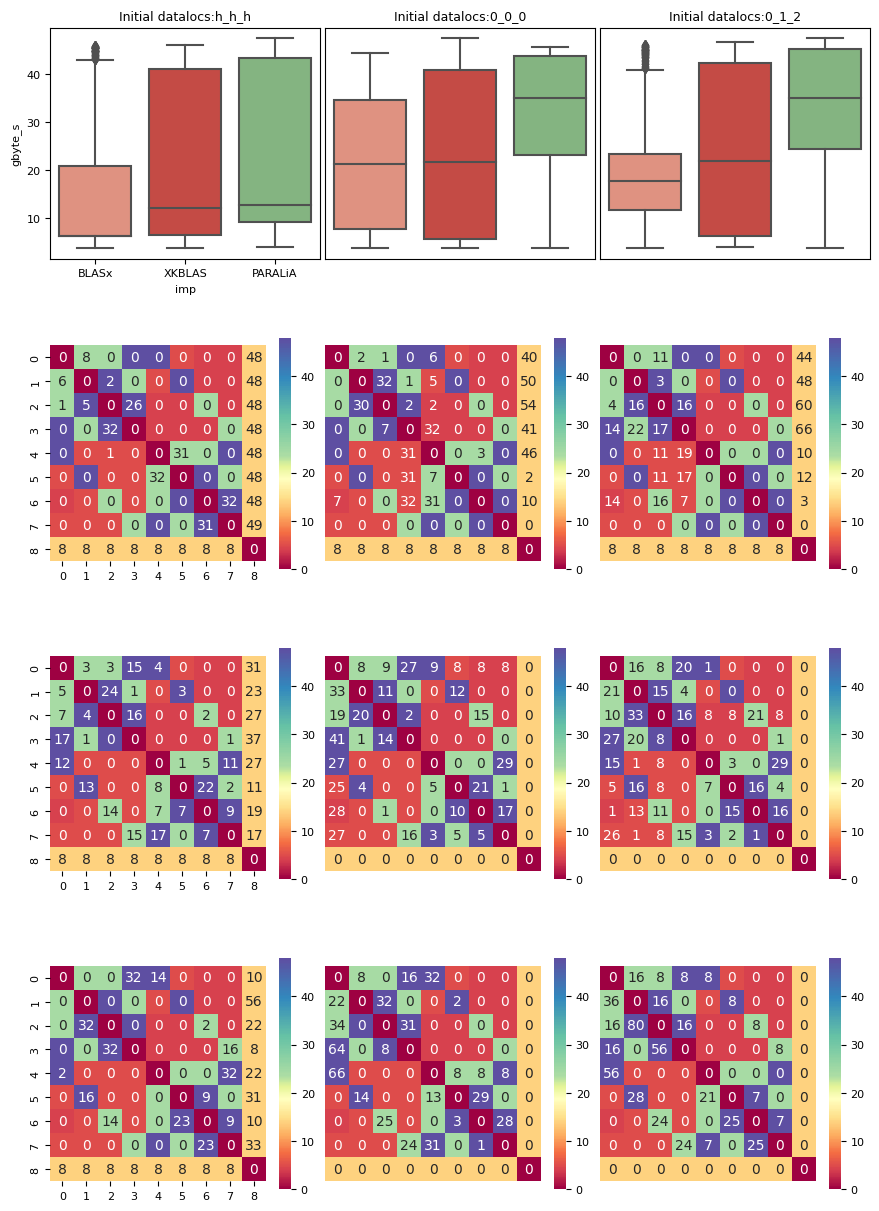

In [12]:
fig, ax = plt.subplots(4,3)
ctr = 0
for scenario in ['h_h_h', '0_0_0','0_1_2']: #,'0_0_-1',
    BLASxEx_data = transfer_log_read('%s/temp_blasx_trans_%s.log' %(trans_log_dir, scenario))
    print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

    XKBLAS_data = transfer_log_read('%s/temp_xkblas_trans_%s.log' %(trans_log_dir, scenario))
    print('XKBLAS_data len: %d\n' % len(XKBLAS_data))

    PARALiA_data = transfer_log_read('%s/temp_n_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_data len: %d\n' % len(PARALiA_data))
    PARALiA_hop_data = transfer_log_read('%s/temp_hop_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_hop_data len: %d\n' % len(PARALiA_hop_data))

    BLASxEx_data['pipe_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['fire_t']
    BLASxEx_data['transfer_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['sced_t']
    BLASxEx_data['gbyte_s'] = BLASxEx_data['bytes']/BLASxEx_data['transfer_t']/1e9
    BLASxEx_data['imp'] = 'BLASx'
    BLASxEx_data['trans_type'] = 'BLASx'
    print("BLASxEx_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(BLASxEx_data), BLASxEx_data['gbyte_s'].mean()))

    XKBLAS_data['pipe_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['fire_t']
    XKBLAS_data['transfer_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['sced_t']
    XKBLAS_data['gbyte_s'] = XKBLAS_data['bytes']/XKBLAS_data['transfer_t']/1e9
    XKBLAS_data['imp'] = 'XKBLAS'
    print("XKBLAS_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(XKBLAS_data), XKBLAS_data['gbyte_s'].mean()))

    PARALiA_data['pipe_t'] = PARALiA_data['complete_t'] - PARALiA_data['fire_t']
    PARALiA_data['transfer_t'] = PARALiA_data['complete_t'] - PARALiA_data['sced_t']
    PARALiA_data['gbyte_s'] = PARALiA_data['bytes']/PARALiA_data['transfer_t']/1e9
    PARALiA_data['imp'] = 'PARALiA_tr'
    print("PARALiA_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_data), PARALiA_data['gbyte_s'].mean()))
    PARALiA_hop_data['pipe_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['fire_t']
    PARALiA_hop_data['transfer_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['sced_t']
    PARALiA_hop_data['gbyte_s'] = PARALiA_hop_data['bytes']/PARALiA_hop_data['transfer_t']/1e9
    PARALiA_hop_data['imp'] = 'PARALiA_tr_tr'
    print("PARALiA_hop_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data), PARALiA_hop_data['gbyte_s'].mean()))
    
    PARALiA_hop_data_unchained = pd.DataFrame(columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
    for index, row in PARALiA_hop_data.iterrows():
        dev_list = row['dev_list'].split()[1:-1]
        #print(dev_list)
        for idx in range(0,len(dev_list)-1):
            src = int(dev_list[idx])
            dest = int(dev_list[idx+1])
            #print (src,dest)
            new_row = pd.DataFrame([[src,dest,'[ %d %d ]' %(src,dest),row['bytes'], row['fire_t'], row['sced_t'], row['complete_t']]],columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
            PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data_unchained, new_row])
    PARALiA_hop_data_unchained = PARALiA_hop_data_unchained.astype({'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64})
    PARALiA_hop_data_unchained['pipe_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['fire_t']
    PARALiA_hop_data_unchained['transfer_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['sced_t']
    PARALiA_hop_data_unchained['gbyte_s'] = PARALiA_hop_data_unchained['bytes']/PARALiA_hop_data_unchained['transfer_t']/1e9
    PARALiA_hop_data_unchained['imp'] = 'PARALiA'
    #print(PARALiA_hop_data_unchained.dtypes)
    #print(PARALiA_hop_data_unchained)
    #PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data])
    print("PARALiA_hop_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data_unchained), PARALiA_hop_data_unchained['gbyte_s'].mean()))

    PARALiA_combined_data = pd.concat([PARALiA_data, PARALiA_hop_data])
    #PARALiA_combined_data['pipe_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['fire_t']
    #PARALiA_combined_data['transfer_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['sced_t']
    #PARALiA_combined_data['gbyte_s'] = PARALiA_combined_data['bytes']/PARALiA_combined_data['transfer_t']/1e9
    #PARALiA_combined_data['imp'] = 'PARALiA_tr'
    print("PARALiA_combined_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data), PARALiA_combined_data['gbyte_s'].mean()))
    
    PARALiA_combined_data_unchained = pd.concat([PARALiA_data, PARALiA_hop_data_unchained])
    PARALiA_combined_data_unchained['imp'] = 'PARALiA'
    print("PARALiA_combined_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data_unchained), PARALiA_combined_data_unchained['gbyte_s'].mean()))
    
    BLASxEx_data.drop(BLASxEx_data[BLASxEx_data['gbyte_s'] >= 50].index, inplace = True)
    XKBLAS_data.drop(XKBLAS_data[XKBLAS_data['gbyte_s'] >= 50].index, inplace = True)
    PARALiA_combined_data_unchained.drop(PARALiA_combined_data_unchained[PARALiA_combined_data_unchained['gbyte_s'] >= 50].index, inplace = True)
    
    data_alldev = pd.concat([BLASxEx_data,XKBLAS_data])
    #data_alldev = pd.concat([data_alldev,PARALiA_combined_data])
    data_alldev = pd.concat([data_alldev,PARALiA_combined_data_unchained])
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] <= 2].index, inplace = True)
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] >= 50].index, inplace = True)
    fig.set_size_inches(width*10/4, height*7)
    fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.02, hspace=0.34)
    #ax[0][ctr].set_ylim([0,50])
    #ax[0][ctr].set_yscale('log')
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[0][ctr])
    ax[0][ctr].set_title('Initial datalocs:' + scenario, size = font+1)
    
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in BLASxEx_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9              
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if idx1 == 8 and idx2 != 8:
                loc_ctr[idx1][idx2]+=8
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #print(labels)
    #sns.heatmap(data=loc_ctr,  ax=ax[1][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=48, vmin=0, cmap = spectral_lessyel)#, fmt = 's') 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in XKBLAS_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                            
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[2][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[2][ctr], square=True, annot=loc_ctr, vmax=48, vmin=0, cmap = spectral_lessyel)#, fmt = 's')   
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in PARALiA_combined_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels)#, vmax=0, vmin=50, fmt = 's') 
    #sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0)#, fmt = 's') 
 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    for index, row in PARALiA_combined_data_unchained.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9         
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's') 
    sns.heatmap(data=labels,  ax=ax[3][ctr], square=True, annot=loc_ctr, vmax=48, vmin=0, cmap = spectral_lessyel)#, fmt = 's')   
    if(ctr!=0):     
        for ctr1 in range (0,4):
            ax[ctr1][ctr].set_yticks([])
            ax[ctr1][ctr].set_yticklabels('')
            ax[ctr1][ctr].minorticks_off()
            ax[ctr1][ctr].set_xticks([])
            ax[ctr1][ctr].set_ylabel('') 
            ax[ctr1][ctr].set_xlabel('')
        
    ctr+=1    
            
fig.savefig('Plot_trans_box_full.png') 

BLASxEx_data len: 624

XKBLAS_data len: 512

PARALiA_data len: 500

PARALiA_hop_data len: 6

BLASxEx_data(scenario=h_h_h) mean of 624 cases -> gbyte_s(ar) = 14.348 Gbytes/s
XKBLAS_data(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 21.036 Gbytes/s
PARALiA_data(scenario=h_h_h) mean of 500 cases -> gbyte_s(ar) = 24.279 Gbytes/s
PARALiA_hop_data(scenario=h_h_h) mean of 6 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_hop_data_unchained(scenario=h_h_h) mean of 12 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_combined_data(scenario=h_h_h) mean of 506 cases -> gbyte_s(ar) = 24.348 Gbytes/s
PARALiA_combined_data_unchained(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 24.416 Gbytes/s
BLASxEx_data len: 540

XKBLAS_data len: 512

PARALiA_data len: 331

PARALiA_hop_data len: 88

BLASxEx_data(scenario=0_0_0) mean of 540 cases -> gbyte_s(ar) = 21.816 Gbytes/s
XKBLAS_data(scenario=0_0_0) mean of 512 cases -> gbyte_s(ar) = 25.503 Gbytes/s
PARALiA_data(scenario=0_0_0) mean of 331 cases -> gb

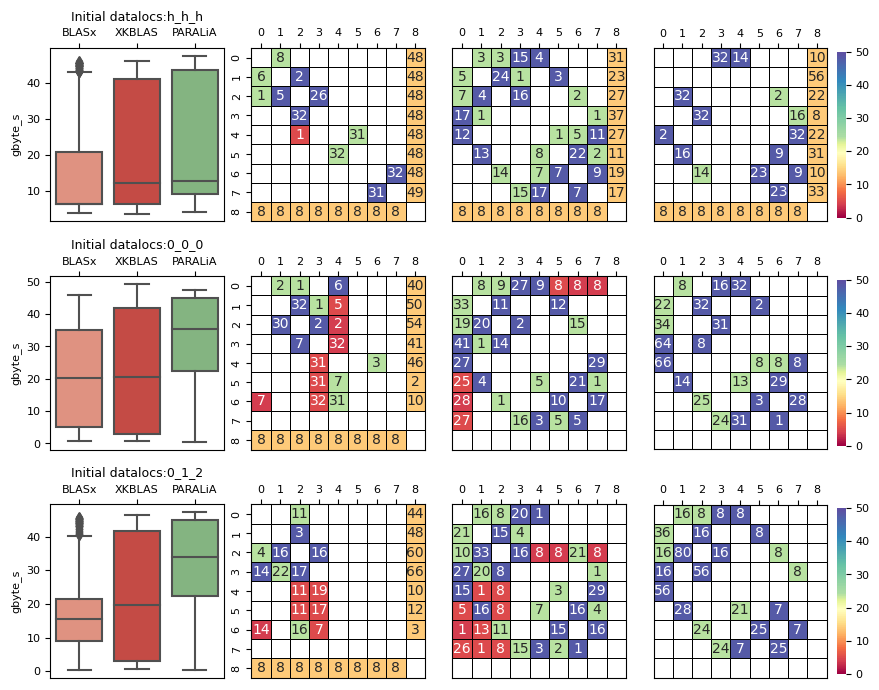

In [13]:
# creating grid for subplots
fig, ax = plt.subplots(3,4,gridspec_kw={'width_ratios': [3.08,3.08,3.08,3.84]})
ctr = 0
for scenario in ['h_h_h', '0_0_0','0_1_2']: #,'0_0_-1',
    BLASxEx_data = transfer_log_read('%s/temp_blasx_trans_%s.log' %(trans_log_dir, scenario))
    print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

    XKBLAS_data = transfer_log_read('%s/temp_xkblas_trans_%s.log' %(trans_log_dir, scenario))
    print('XKBLAS_data len: %d\n' % len(XKBLAS_data))

    PARALiA_data = transfer_log_read('%s/temp_n_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_data len: %d\n' % len(PARALiA_data))
    PARALiA_hop_data = transfer_log_read('%s/temp_hop_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_hop_data len: %d\n' % len(PARALiA_hop_data))

    BLASxEx_data['pipe_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['fire_t']
    BLASxEx_data['transfer_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['sced_t']
    BLASxEx_data['gbyte_s'] = BLASxEx_data['bytes']/BLASxEx_data['transfer_t']/1e9
    BLASxEx_data['imp'] = 'BLASx'
    BLASxEx_data['trans_type'] = 'BLASx'
    print("BLASxEx_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(BLASxEx_data), BLASxEx_data['gbyte_s'].mean()))

    XKBLAS_data['pipe_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['fire_t']
    XKBLAS_data['transfer_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['sced_t']
    XKBLAS_data['gbyte_s'] = XKBLAS_data['bytes']/XKBLAS_data['transfer_t']/1e9
    XKBLAS_data['imp'] = 'XKBLAS'
    print("XKBLAS_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(XKBLAS_data), XKBLAS_data['gbyte_s'].mean()))

    PARALiA_data['pipe_t'] = PARALiA_data['complete_t'] - PARALiA_data['fire_t']
    PARALiA_data['transfer_t'] = PARALiA_data['complete_t'] - PARALiA_data['sced_t']
    PARALiA_data['gbyte_s'] = PARALiA_data['bytes']/PARALiA_data['transfer_t']/1e9
    PARALiA_data['imp'] = 'PARALiA_tr'
    print("PARALiA_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_data), PARALiA_data['gbyte_s'].mean()))
    PARALiA_hop_data['pipe_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['fire_t']
    PARALiA_hop_data['transfer_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['sced_t']
    PARALiA_hop_data['gbyte_s'] = PARALiA_hop_data['bytes']/PARALiA_hop_data['transfer_t']/1e9
    PARALiA_hop_data['imp'] = 'PARALiA_tr'
    print("PARALiA_hop_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data), PARALiA_hop_data['gbyte_s'].mean()))
    
    PARALiA_hop_data_unchained = pd.DataFrame(columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
    for index, row in PARALiA_hop_data.iterrows():
        dev_list = row['dev_list'].split()[1:-1]
        #print(dev_list)
        for idx in range(0,len(dev_list)-1):
            src = int(dev_list[idx])
            dest = int(dev_list[idx+1])
            #print (src,dest)
            new_row = pd.DataFrame([[src,dest,'[ %d %d ]' %(src,dest),row['bytes'], row['fire_t'], row['sced_t'], row['complete_t']]],columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
            PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data_unchained, new_row])
    PARALiA_hop_data_unchained = PARALiA_hop_data_unchained.astype({'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64})
    PARALiA_hop_data_unchained['pipe_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['fire_t']
    PARALiA_hop_data_unchained['transfer_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['sced_t']
    PARALiA_hop_data_unchained['gbyte_s'] = PARALiA_hop_data_unchained['bytes']/PARALiA_hop_data_unchained['transfer_t']/1e9
    PARALiA_hop_data_unchained['imp'] = 'PARALiA'
    #print(PARALiA_hop_data_unchained.dtypes)
    #print(PARALiA_hop_data_unchained)
    #PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data])
    print("PARALiA_hop_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data_unchained), PARALiA_hop_data_unchained['gbyte_s'].mean()))

    PARALiA_combined_data = pd.concat([PARALiA_data, PARALiA_hop_data])
    #PARALiA_combined_data['pipe_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['fire_t']
    #PARALiA_combined_data['transfer_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['sced_t']
    #PARALiA_combined_data['gbyte_s'] = PARALiA_combined_data['bytes']/PARALiA_combined_data['transfer_t']/1e9
    #PARALiA_combined_data['imp'] = 'PARALiA_tr'
    print("PARALiA_combined_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data), PARALiA_combined_data['gbyte_s'].mean()))
    
    PARALiA_combined_data_unchained = pd.concat([PARALiA_data, PARALiA_hop_data_unchained])
    PARALiA_combined_data_unchained['imp'] = 'PARALiA'
    print("PARALiA_combined_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data_unchained), PARALiA_combined_data_unchained['gbyte_s'].mean()))
    
    BLASxEx_data.drop(BLASxEx_data[BLASxEx_data['gbyte_s'] >= 50].index, inplace = True)
    XKBLAS_data.drop(XKBLAS_data[XKBLAS_data['gbyte_s'] >= 50].index, inplace = True)
    PARALiA_combined_data_unchained.drop(PARALiA_combined_data_unchained[PARALiA_combined_data_unchained['gbyte_s'] >= 50].index, inplace = True)
    
    data_alldev = pd.concat([BLASxEx_data,XKBLAS_data])
    #data_alldev = pd.concat([data_alldev,PARALiA_combined_data])
    data_alldev = pd.concat([data_alldev,PARALiA_combined_data_unchained])
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] <= 2].index, inplace = True)
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] >= 50].index, inplace = True)
    fig.set_size_inches(width*10/4, height*4)
    fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.15, hspace=0.1)
    #ax[0][ctr].set_ylim([0,50])
    #ax[0][ctr].set_yscale('log')
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[ctr][0])
    ax[ctr][0].set_title('Initial datalocs:' + scenario, size = font+1)
    ax[ctr][0].set_aspect(1.0/ax[ctr][0].get_data_ratio(), adjustable='box')
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in BLASxEx_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9              
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if idx1 == 8 and idx2 != 8:
                loc_ctr[idx1][idx2]+=8
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #print(labels)
    #sns.heatmap(data=loc_ctr,  ax=ax[1][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  

    sns.heatmap(data=labels,  ax=ax[ctr][1], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in XKBLAS_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                            
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0                
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[2][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[ctr][2], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels)#, vmax=0, vmin=50, fmt = 's') 
    #sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr)#, fmt = 's') 
 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data_unchained.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9         
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')
    sns.heatmap(data=labels,  ax=ax[ctr][3], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar_kws={"shrink": 0.8})#, fmt = 's')  
    for ctr1 in range (0,4):
        for _, spine in ax[ctr][ctr1].spines.items():
            spine.set_visible(True)
        
        ax[ctr][ctr1].set_xlabel('')
        if(ctr1 > 1):     
            ax[ctr][ctr1].set_yticks([])
            ax[ctr][ctr1].set_yticklabels('')
            ax[ctr][ctr1].minorticks_off()
            ax[ctr][ctr1].set_ylabel('') 
        #if(ctr > 0):
        #    ax[ctr][ctr1].set_xticks([])
        #else:
        ax[ctr][ctr1].xaxis.tick_top()
    ctr+=1        
fig.savefig('Plot_trans_box_full_maskzer.png')

BLASxEx_data len: 624

XKBLAS_data len: 512

PARALiA_data len: 500

PARALiA_hop_data len: 6

BLASxEx_data(scenario=h_h_h) mean of 624 cases -> gbyte_s(ar) = 14.348 Gbytes/s
XKBLAS_data(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 21.036 Gbytes/s
PARALiA_data(scenario=h_h_h) mean of 500 cases -> gbyte_s(ar) = 24.279 Gbytes/s
PARALiA_hop_data(scenario=h_h_h) mean of 6 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_hop_data_unchained(scenario=h_h_h) mean of 12 cases -> gbyte_s(ar) = 30.138 Gbytes/s
PARALiA_combined_data(scenario=h_h_h) mean of 506 cases -> gbyte_s(ar) = 24.348 Gbytes/s
PARALiA_combined_data_unchained(scenario=h_h_h) mean of 512 cases -> gbyte_s(ar) = 24.416 Gbytes/s
BLASxEx_data len: 540

XKBLAS_data len: 512

PARALiA_data len: 331

PARALiA_hop_data len: 88

BLASxEx_data(scenario=0_0_0) mean of 540 cases -> gbyte_s(ar) = 21.816 Gbytes/s
XKBLAS_data(scenario=0_0_0) mean of 512 cases -> gbyte_s(ar) = 25.503 Gbytes/s
PARALiA_data(scenario=0_0_0) mean of 331 cases -> gb

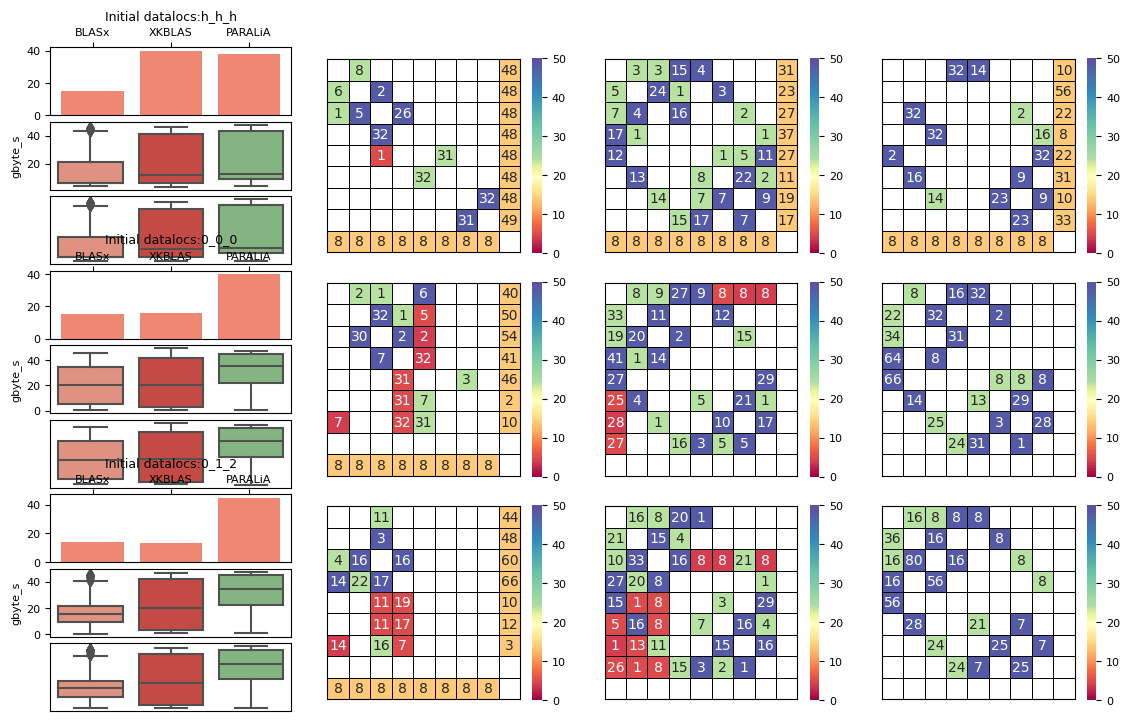

In [70]:
perf_total = [[15,40,38],[15,16,40],[14,13,45]]
fig = plt.figure()
fig.set_size_inches(width*10/4*3, height*4)
fig.subplots_adjust(left=.05, bottom=.12, right=.99, top=.89, wspace=0.15, hspace=0.1)
ctr = 0
for scenario in ['h_h_h', '0_0_0','0_1_2']: #,'0_0_-1', 
    ax1 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr, 0), colspan=1)
    ax2 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr+1, 0), colspan=1)
    ax3 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr+2, 0), colspan=1)
    ax4 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr, 1), rowspan=3)
    ax5 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr, 2), rowspan=3)
    ax6 = plt.subplot2grid(shape=(9, 9), loc=(3*ctr, 3), rowspan=3)
    ax[ctr] = [ax1, ax2, ax3, ax4, ax5, ax6]
    
    BLASxEx_data = transfer_log_read('%s/temp_blasx_trans_%s.log' %(trans_log_dir, scenario))
    print('BLASxEx_data len: %d\n' % len(BLASxEx_data))

    XKBLAS_data = transfer_log_read('%s/temp_xkblas_trans_%s.log' %(trans_log_dir, scenario))
    print('XKBLAS_data len: %d\n' % len(XKBLAS_data))

    PARALiA_data = transfer_log_read('%s/temp_n_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_data len: %d\n' % len(PARALiA_data))
    PARALiA_hop_data = transfer_log_read('%s/temp_hop_trans_%s.log' %(trans_log_dir, scenario))
    print('PARALiA_hop_data len: %d\n' % len(PARALiA_hop_data))

    BLASxEx_data['pipe_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['fire_t']
    BLASxEx_data['transfer_t'] = BLASxEx_data['complete_t'] - BLASxEx_data['sced_t']
    BLASxEx_data['gbyte_s'] = BLASxEx_data['bytes']/BLASxEx_data['transfer_t']/1e9
    BLASxEx_data['imp'] = 'BLASx'
    BLASxEx_data['trans_type'] = 'BLASx'
    print("BLASxEx_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(BLASxEx_data), BLASxEx_data['gbyte_s'].mean()))

    XKBLAS_data['pipe_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['fire_t']
    XKBLAS_data['transfer_t'] = XKBLAS_data['complete_t'] - XKBLAS_data['sced_t']
    XKBLAS_data['gbyte_s'] = XKBLAS_data['bytes']/XKBLAS_data['transfer_t']/1e9
    XKBLAS_data['imp'] = 'XKBLAS'
    print("XKBLAS_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(XKBLAS_data), XKBLAS_data['gbyte_s'].mean()))

    PARALiA_data['pipe_t'] = PARALiA_data['complete_t'] - PARALiA_data['fire_t']
    PARALiA_data['transfer_t'] = PARALiA_data['complete_t'] - PARALiA_data['sced_t']
    PARALiA_data['gbyte_s'] = PARALiA_data['bytes']/PARALiA_data['transfer_t']/1e9
    PARALiA_data['imp'] = 'PARALiA_tr'
    print("PARALiA_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_data), PARALiA_data['gbyte_s'].mean()))
    PARALiA_hop_data['pipe_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['fire_t']
    PARALiA_hop_data['transfer_t'] = PARALiA_hop_data['complete_t'] - PARALiA_hop_data['sced_t']
    PARALiA_hop_data['gbyte_s'] = PARALiA_hop_data['bytes']/PARALiA_hop_data['transfer_t']/1e9
    PARALiA_hop_data['imp'] = 'PARALiA_tr'
    print("PARALiA_hop_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data), PARALiA_hop_data['gbyte_s'].mean()))
    
    PARALiA_hop_data_unchained = pd.DataFrame(columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
    for index, row in PARALiA_hop_data.iterrows():
        dev_list = row['dev_list'].split()[1:-1]
        #print(dev_list)
        for idx in range(0,len(dev_list)-1):
            src = int(dev_list[idx])
            dest = int(dev_list[idx+1])
            #print (src,dest)
            new_row = pd.DataFrame([[src,dest,'[ %d %d ]' %(src,dest),row['bytes'], row['fire_t'], row['sced_t'], row['complete_t']]],columns = ['src','dest', 'dev_list', 'bytes','fire_t','sced_t', 'complete_t'])
            PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data_unchained, new_row])
    PARALiA_hop_data_unchained = PARALiA_hop_data_unchained.astype({'src': np.int64, 'dest': np.int64, 'dev_list': str, 'bytes': np.int64, 'fire_t': np.float64, 'sced_t': np.float64, 'complete_t': np.float64})
    PARALiA_hop_data_unchained['pipe_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['fire_t']
    PARALiA_hop_data_unchained['transfer_t'] = PARALiA_hop_data_unchained['complete_t'] - PARALiA_hop_data_unchained['sced_t']
    PARALiA_hop_data_unchained['gbyte_s'] = PARALiA_hop_data_unchained['bytes']/PARALiA_hop_data_unchained['transfer_t']/1e9
    PARALiA_hop_data_unchained['imp'] = 'PARALiA'
    #print(PARALiA_hop_data_unchained.dtypes)
    #print(PARALiA_hop_data_unchained)
    #PARALiA_hop_data_unchained = pd.concat([PARALiA_hop_data])
    print("PARALiA_hop_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_hop_data_unchained), PARALiA_hop_data_unchained['gbyte_s'].mean()))

    PARALiA_combined_data = pd.concat([PARALiA_data, PARALiA_hop_data])
    #PARALiA_combined_data['pipe_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['fire_t']
    #PARALiA_combined_data['transfer_t'] = PARALiA_combined_data['complete_t'] - PARALiA_combined_data['sced_t']
    #PARALiA_combined_data['gbyte_s'] = PARALiA_combined_data['bytes']/PARALiA_combined_data['transfer_t']/1e9
    #PARALiA_combined_data['imp'] = 'PARALiA_tr'
    print("PARALiA_combined_data(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data), PARALiA_combined_data['gbyte_s'].mean()))
    
    PARALiA_combined_data_unchained = pd.concat([PARALiA_data, PARALiA_hop_data_unchained])
    PARALiA_combined_data_unchained['imp'] = 'PARALiA'
    print("PARALiA_combined_data_unchained(scenario=%s) mean of %d cases -> gbyte_s(ar) = %.3lf Gbytes/s" % (scenario, len(PARALiA_combined_data_unchained), PARALiA_combined_data_unchained['gbyte_s'].mean()))
    
    BLASxEx_data.drop(BLASxEx_data[BLASxEx_data['gbyte_s'] >= 50].index, inplace = True)
    XKBLAS_data.drop(XKBLAS_data[XKBLAS_data['gbyte_s'] >= 50].index, inplace = True)
    PARALiA_combined_data_unchained.drop(PARALiA_combined_data_unchained[PARALiA_combined_data_unchained['gbyte_s'] >= 50].index, inplace = True)
    
    data_alldev = pd.concat([BLASxEx_data,XKBLAS_data])
    #data_alldev = pd.concat([data_alldev,PARALiA_combined_data])
    data_alldev = pd.concat([data_alldev,PARALiA_combined_data_unchained])
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] <= 2].index, inplace = True)
    #data_alldev.drop(data_alldev[data_alldev['gbyte_s'] >= 50].index, inplace = True)
    #ax[0][ctr].set_ylim([0,50])
    #ax[0][ctr].set_yscale('log')
    ax[ctr][0].bar(['BLASx','XKBLAS','PARALiA'], perf_total[ctr])#, color ='maroon',width = 0.4)
    ax[ctr][0].set_title('Initial datalocs:' + scenario, size = font+1)
    #ax[ctr][0].set_aspect(1.0/ax[ctr][0].get_data_ratio(), adjustable='box')
    
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[ctr][1])
    sns.boxplot(data=data_alldev, x = 'imp', y = 'gbyte_s',  ax=ax[ctr][2])
    
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in BLASxEx_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9              
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if idx1 == 8 and idx2 != 8:
                loc_ctr[idx1][idx2]+=8
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #print(labels)
    #sns.heatmap(data=loc_ctr,  ax=ax[1][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  

    sns.heatmap(data=labels,  ax=ax[ctr][3], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar_kws={"shrink": 0.9})#, cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in XKBLAS_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                            
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0                
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[2][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')  
    sns.heatmap(data=labels,  ax=ax[ctr][4], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar_kws={"shrink": 0.9})#, cbar = False)#, fmt = 's')  
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9                
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels)#, vmax=0, vmin=50, fmt = 's') 
    #sns.heatmap(data=labels,  ax=ax[1][ctr], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr)#, fmt = 's') 
 
    loc_ctr = np.zeros((9, 9))
    bw_sum = np.zeros((9, 9))
    labels = np.zeros((9, 9))
    maskarr = np.ones((9, 9))
    for index, row in PARALiA_combined_data_unchained.iterrows():
        dest = row['dest'] if (row['dest'] != -1) else 8
        src = row['src'] if (row['src'] != -1) else 8 
        if dest == src:
            x = 1
        else:
            loc_ctr[dest][src]+= 1
            bw_sum[dest][src]+= row['bytes']/row['transfer_t']/1e9         
    for idx1 in range(0,9):
        for idx2 in range(0,9):
            if loc_ctr[idx1][idx2]!= 0:
                labels[idx1][idx2] = int(bw_sum[idx1][idx2]/loc_ctr[idx1][idx2])
                maskarr[idx1][idx2] = 0
            else:
                labels[idx1][idx2] = 0
    labels = np.array([[0,24,24,48,48,5,4,4,14], [24,0,48,24,5,48,4,4,14], [24,48,0,48,4,4,24,4,14], [48,24,48,0,4,4,4,24,14], [48,5,5,5,0,24,24,48,14], 
                      [5,48,5,5,24,0,48,24,14], [4,5,24,5,24,48,0,48,14], [5,5,5,24,48,24,48,0,14], [14,14,14,14,14,14,14,14,0]])
    #sns.heatmap(data=loc_ctr,  ax=ax[3][ctr], square=True, annot=labels, vmax=0, vmin=60)#, vmax=0, vmin=50, fmt = 's')
    sns.heatmap(data=labels,  ax=ax[ctr][5], square=True, annot=loc_ctr, vmax=50, vmin=0, mask = maskarr, cmap = spectral_lessyel, linewidths =0.4, linecolor = 'k', cbar_kws={"shrink": 0.9})#, fmt = 's')  
    for ctr1 in range (0,6):
        for _, spine in ax[ctr][ctr1].spines.items():
            spine.set_visible(True)
        
        ax[ctr][ctr1].set_xlabel('')
        if(ctr1 > 1):     
            ax[ctr][ctr1].set_yticks([])
            ax[ctr][ctr1].set_yticklabels('')
            ax[ctr][ctr1].minorticks_off()
            ax[ctr][ctr1].set_ylabel('') 
        if(ctr1 > 0):
            ax[ctr][ctr1].set_xticks([])
        else:
            ax[ctr][ctr1].xaxis.tick_top()
    ctr+=1        
fig.savefig('Plot_trans_box_full_maskzer_exp.png')
